# LimberJack Target Practice

## Model

In [59]:
] activate "."

  Activating project at `~/Glamdring/MicroCanonicalHMC.jl`


In [60]:
using LinearAlgebra
using Turing
using LimberJack
using DataFrames
using CSV
using YAML
using NPZ
using PythonCall
sacc = pyimport("sacc");

using Plots

using Revise
using MicroCanonicalHMC

In [61]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DECALS/DECALS.yml"
sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)
DECALS_meta, DECALS_files = make_data(sacc_file, yaml_file)

DECALS_data = DECALS_meta.data
DECALS_cov = DECALS_meta.cov;

DECALS__0 DECALS__0 3
DECALS__1 DECALS__1 7
DECALS__2 DECALS__2 9
DECALS__3 DECALS__3 11


In [62]:
@model function DECALS_model(data)
    #KiDS priors
    Ωm ~ Uniform(0.2, 0.6)
    Ωb ~ Uniform(0.028, 0.065)
    h ~ TruncatedNormal(72, 5, 0.64, 0.82)
    s8 ~ Uniform(0.4, 1.2)
    ns ~ Uniform(0.84, 1.1)

    DECALS__0_b ~ Uniform(0.8, 3.0)
    DECALS__1_b ~ Uniform(0.8, 3.0)
    DECALS__2_b ~ Uniform(0.8, 3.0)
    DECALS__3_b ~ Uniform(0.8, 3.0)
    DECALS__0_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DECALS__1_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DECALS__2_dz ~ TruncatedNormal(0.0, 0.006, -0.2, 0.2)
    DECALS__3_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)

    nuisances = Dict("DECALS__0_b" => DECALS__0_b,
                     "DECALS__1_b" => DECALS__1_b,
                     "DECALS__2_b" => DECALS__2_b,
                     "DECALS__3_b" => DECALS__3_b,
                     "DECALS__0_dz" => DECALS__0_dz,
                     "DECALS__1_dz" => DECALS__1_dz,
                     "DECALS__2_dz" => DECALS__2_dz,
                     "DECALS__3_dz" => DECALS__3_dz)

    cosmology = Cosmology(Ωm, Ωb, h, ns, s8,
                          tk_mode="EisHu",
                          Pk_mode="Halofit")

    theory = Theory(cosmology, DECALS_meta, DECALS_files; Nuisances=nuisances)
    data ~ MvNormal(theory, DECALS_cov)
end

DECALS_model (generic function with 2 methods)

In [63]:
DECALS_model_cond = DECALS_model(DECALS_data)
DECALS_target = TuringTarget(DECALS_model_cond);

In [64]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/DESY1.yml"
sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)
DES_meta, DES_files = make_data(sacc_file, yaml_file)

DES_data = DES_meta.data
DES_cov = DES_meta.cov;

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESwl__0 5
DESgc__0 DESwl__1 5
DESgc__0 DESwl__2 5
DESgc__0 DESwl__3 5
DESgc__1 DESwl__0 8
DESgc__1 DESwl__1 8
DESgc__1 DESwl__2 8
DESgc__1 DESwl__3 8
DESgc__2 DESwl__0 10
DESgc__2 DESwl__1 10
DESgc__2 DESwl__2 10
DESgc__2 DESwl__3 10
DESgc__3 DESwl__0 11
DESgc__3 DESwl__1 11
DESgc__3 DESwl__2 11
DESgc__3 DESwl__3 11
DESgc__4 DESwl__0 13
DESgc__4 DESwl__1 13
DESgc__4 DESwl__2 13
DESgc__4 DESwl__3 13
DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24


In [65]:
@model function DES_model(data)
    #KiDS priors
    Ωm ~ Uniform(0.2, 0.6)
    Ωb ~ Uniform(0.028, 0.065)
    h ~ TruncatedNormal(72, 5, 0.64, 0.82)
    s8 ~ Uniform(0.4, 1.2)
    ns ~ Uniform(0.84, 1.1)

    DESgc__0_b ~ Uniform(0.8, 3.0)
    DESgc__1_b ~ Uniform(0.8, 3.0)
    DESgc__2_b ~ Uniform(0.8, 3.0)
    DESgc__3_b ~ Uniform(0.8, 3.0)
    DESgc__4_b ~ Uniform(0.8, 3.0)
    DESgc__0_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DESgc__1_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DESgc__2_dz ~ TruncatedNormal(0.0, 0.006, -0.2, 0.2)
    DESgc__3_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)
    DESgc__4_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)
    #DESwl__0_dz ~ TruncatedNormal(-0.001, 0.016, -0.2, 0.2)
    #DESwl__1_dz ~ TruncatedNormal(-0.019, 0.013, -0.2, 0.2)
    #DESwl__2_dz ~ TruncatedNormal(0.009, 0.011, -0.2, 0.2)
    #DESwl__3_dz ~ TruncatedNormal(-0.018, 0.022, -0.2, 0.2)
    #DESwl__0_m ~ Normal(0.012, 0.023)
    #DESwl__1_m ~ Normal(0.012, 0.023)
    #DESwl__2_m ~ Normal(0.012, 0.023)
    #DESwl__3_m ~ Normal(0.012, 0.023)
    A_IA ~ Uniform(-5, 5) 
    alpha_IA ~ Uniform(-5, 5)

    nuisances = Dict("DESgc__0_b" => DESgc__0_b,
                     "DESgc__1_b" => DESgc__1_b,
                     "DESgc__2_b" => DESgc__2_b,
                     "DESgc__3_b" => DESgc__3_b,
                     "DESgc__4_b" => DESgc__4_b,
                     "DESgc__0_dz" => DESgc__0_dz,
                     "DESgc__1_dz" => DESgc__1_dz,
                     "DESgc__2_dz" => DESgc__2_dz,
                     "DESgc__3_dz" => DESgc__3_dz,
                     "DESgc__4_dz" => DESgc__4_dz,
                     #"DESwl__0_dz" => DESwl__0_dz,
                     #"DESwl__1_dz" => DESwl__1_dz,
                     #"DESwl__2_dz" => DESwl__2_dz,
                     #"DESwl__3_dz" => DESwl__3_dz,
                     #"DESwl__0_m" => DESwl__0_m,
                     #"DESwl__1_m" => DESwl__1_m,
                     #"DESwl__2_m" => DESwl__2_m,
                     #"DESwl__3_m" => DESwl__3_m,
                     "A_IA" => A_IA,
                     "alpha_IA" => alpha_IA,)

    cosmology = Cosmology(Ωm, Ωb, h, ns, s8,
                          tk_mode="EisHu",
                          Pk_mode="Halofit")

    theory = Theory(cosmology, DES_meta, DES_files; Nuisances=nuisances)
    data ~ MvNormal(theory, DES_cov)
end

DES_model (generic function with 2 methods)

In [66]:
DES_model_cond = DES_model(DES_data)
DES_target = TuringTarget(DES_model_cond);

## Sampling

In [67]:
DECALS_precond = [0.00836992, 0.0024753 , 0.0244054 , 0.03815257, 0.02393229,
       0.05916945, 0.07078313, 0.06694585, 0.08765118, 0.00433279,
       0.00390493, 0.00271033, 0.00561002];
DES_precond = [0.25172500083748506, 0.07615331840979878, 0.37013779031128646, 
    0.3843438188676137, 0.66814760350777, 0.8815675051765066,
    0.9394373992565151, 0.8754431458494949, 1.0579197741114286, 
    1.1360573907868132, 0.05074804177049421, 0.04576895785968372, 
    0.040605876361027006, 0.0698845598057394, 0.06847370659245473, 
    0.1073231095323539, 0.08204992978227615, 0.07646449193174346, 
    0.14333612007022253, 0.18312865481644083, 0.1591611428637791,
    0.14871287866734334, 0.17758496819457525, 1.4368354719127692, 15.568989342724386];

In [72]:
DECALS_spl = MCHMC(0.0, sqrt(13); init_eps=0.6, VarE_wanted=0.001, sigma=DECALS_precond)
DES_spl = MCHMC(0.0, sqrt(17); init_eps=0.6, VarE_wanted=0.001, sigma=ones(17)); #DES_precond);

In [73]:
samples= Sample(DES_spl, DES_target, 1_000;
                burn_in=200, tuning_method="AdaptiveStep", dialog=true)

[ Info: Using given sigma ✅
[ Info: Tuning eps ⏳
[ Info: Using given L ✅
[ Info: Starting burn in


Using eps tuning method AdaptiveStep


[ Info: Burn in finished


eps: 0.6 --> VarE/d: 29.7471600995858
eps: 0.28802461773061366 --> VarE/d: 2.23439897161286
eps: 0.2313576595289335 --> VarE/d: 0.8587457166382129
eps: 0.211282761273692 --> VarE/d: 1.1534172157181546
eps: 0.19484117246705582 --> VarE/d: 0.021984866119931237
eps: 0.21124946170049524 --> VarE/d: 0.15497164788015305
eps: 0.21302116620856748 --> VarE/d: 2.1868425650396163e-5
eps: 0.23355905879092068 --> VarE/d: 0.23997293517703538
eps: 0.23237981031005914 --> VarE/d: 0.00198041604845594
eps: 0.2537453719074886 --> VarE/d: 1.4716532338124477
eps: 0.2428871517318896 --> VarE/d: 2.3548821690817534
eps: 0.23145357353896998 --> VarE/d: 0.29969956185915503
eps: 0.2296344710768007 --> VarE/d: 2.0134799559654097
eps: 0.22080758748269716 --> VarE/d: 0.03762630731266163
eps: 0.22697521820095937 --> VarE/d: 0.22068634236884138
eps: 0.2266155017341814 --> VarE/d: 0.04784762665207413
eps: 0.2314808655961817 --> VarE/d: 0.12118644739388505
eps: 0.2331652699658942 --> VarE/d: 0.034682462374032
eps: 0.23

1001-element Vector{Any}:
 [0.2100056364883737, 0.054947855528115555, 0.8089502187454656, 0.935847071255649, 0.9544265558751451, 1.1134435591718679, 1.0533824850058533, 1.7828795279640266, 0.8182535116709856, 2.5644840831732196, -0.0034084248206006917, 0.0022204853222292376, -0.013153008127399973, 0.003992558636868371, 0.00755631162734316, -4.802509188505635, -2.54220208450545, 0.0, 5814.779149862424]
 [0.20535350835377814, 0.03435645248038764, 0.8038830243384146, 1.012230745115988, 1.0469134210950497, 1.163931876654536, 1.4352821162502658, 1.426695894568432, 1.7454269067113755, 1.7945006632833667, -0.0015735459151270947, -0.002018505778313917, -0.002312825111253858, 0.0008245278016558721, -0.001264020584222425, 0.6104063487558768, 1.580429932122005, 3.611866213632311, 8559.328718830586]
 [0.20535542410328517, 0.03432973114009272, 0.8038322035323465, 0.9879379968691565, 1.0474289781086148, 1.1619722034893858, 1.4163476649804052, 1.3969414424164852, 1.708097627506167, 1.7820019076171112

In [74]:
_samples = mapreduce(permutedims, vcat, samples)
ssigma = std(_samples, dims=1)[1:end-2]

17-element Vector{Float64}:
 0.012754318546546706
 0.0038016880144169725
 0.005997142717455296
 0.033858789450527345
 0.021252218490765445
 0.046633488608239515
 0.0566308940400348
 0.05354593510705197
 0.07113126635252719
 0.06182442278404004
 0.003785948477072264
 0.0024783572798972556
 0.004903252280680339
 0.0032439616914335836
 0.0027572212549483513
 0.18826503994443625
 0.6107561659577008

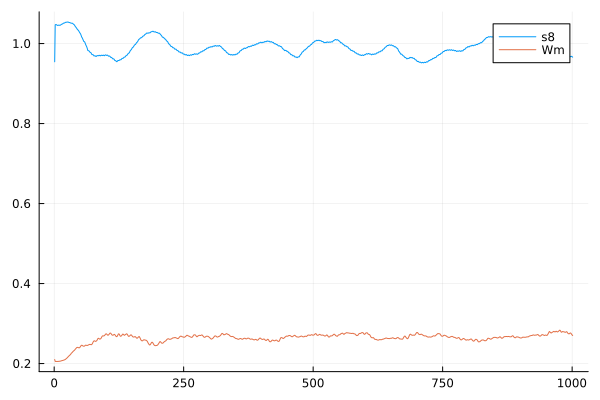

In [75]:
s8s = [sample[5] for sample in samples]
Wms = [sample[1] for sample in samples]
plot(s8s, label="s8")
plot!(Wms, label="Wm")

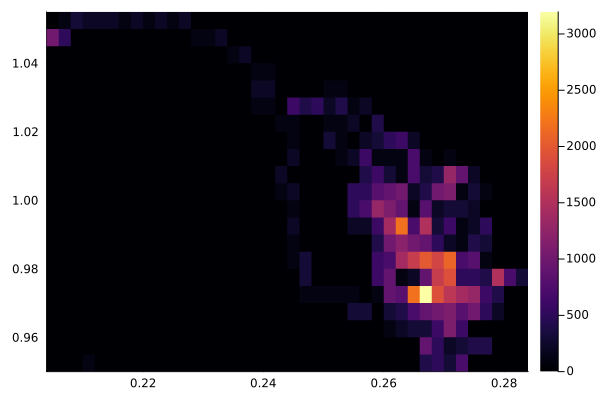

In [76]:
histogram2d(Wms, s8s, bins=(40,40), show_empty_bins=true,
            ranges = [[0.2, 0.4],[0.6, 1.2]], normalize=:pdf)

In [45]:
E = [sample[end-1] for sample in samples[1:end-1]]#
std(E)^2/21

0.4984360501720347

In [51]:

std(Wms)

0.02674654432927358

In [40]:
b1s = [sample[6] for sample in samples[200:end]]
std(b1s)

0.20614423563229425

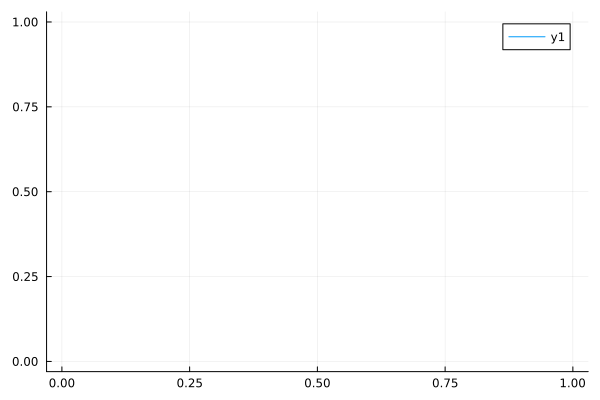

In [15]:
plot(Wms)

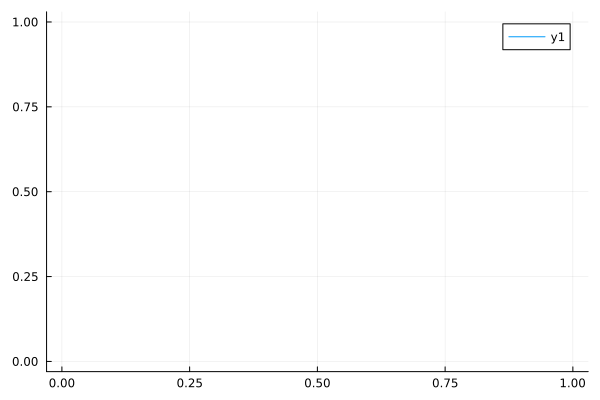

In [16]:
plot(b1s)

## NUTS

In [39]:
samples_hmc = sample(stat_model, NUTS(100, 0.65),
                     300, progress=true; save_state=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling:   4%|█▍                                       |  ETA: 0:02:26┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
Sampling: 100%|█████████████████████████████████████████| Time: 1:14:57


Chains MCMC chain (300×25×1 Array{Float64, 3}):

Iterations        = 101:1:400
Number of chains  = 1
Samples per chain = 300
Wall duration     = 4502.67 seconds
Compute duration  = 4502.67 seconds
parameters        = Ωm, Ωb, h, s8, ns, DECALS__0_b, DECALS__1_b, DECALS__2_b, DECALS__3_b, DECALS__0_dz, DECALS__1_dz, DECALS__2_dz, DECALS__3_dz
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
    parameters      mean       std   naive_se      mcse        ess      rhat   ⋯
        Symbol   Float64   Float64    Float64   Float64    Float64   Float64   ⋯

            Ωm    0.2811    0.0226     0.0013    0.0024    98.0312    1.0213   ⋯
            Ωb    0.0402    0.0069     0.0004    0.0005   144.1265    1.0020   ⋯
             h    0.7376    0.0470     0.0027    0.0050   105.2713    1.0019   ⋯
            s8    0.9177   

In [15]:
summary_hmc.ess

25-element Vector{Float64}:
  107.13649180104869
  331.4835789816811
  207.484061400768
  111.64048654758332
  600.4013034569028
  114.39496059843647
  117.33719647252566
  114.56966849849671
  111.15547545924896
  105.06968640469209
  961.3377488207435
  700.0507524844818
  837.2166448905194
  682.3676139298411
  566.0490257440192
  837.5008331222044
  733.9973963424983
  549.1048795030388
  792.5424251430129
 1009.6818545217956
  763.2299996132994
  872.0250289709837
  763.7811879280131
  552.5319549420313
  731.942598764305

In [16]:
Wms_hmc = vec(samples_hmc[!, "Ωm"])
s8s_hmc = vec(samples_hmc[!, "s8"]);

In [17]:
Wm_hmc_ker = ash(Wms_hmc; m=30)
s8_hmc_ker = ash(s8s_hmc; m=30)
Wm_mchmc_ker = ash(Wms_mchmc; m=30)
s8_mchmc_ker = ash(s8s_mchmc; m=30);

LoadError: UndefVarError: `Wms_mchmc` not defined

In [18]:
Plots.plot(Wm_mchmc_ker; hist=false, label="MCHMC")
Plots.plot!(Wm_hmc_ker; hist=false, label="HMC", xlabel="Wm")

LoadError: UndefVarError: `Wm_mchmc_ker` not defined

In [19]:
Plots.plot(s8_mchmc_ker; hist=false, label="MCHMC")
Plots.plot!(s8_hmc_ker; hist=false, label="HMC",  xlabel="s8")

LoadError: UndefVarError: `s8_mchmc_ker` not defined

## Self-tuning

In [20]:
mchmc = Sampler()
println(string("L = ", mchmc.settings.L, ", eps = ", mchmc.settings.eps))
# This should start self-tuning    

LoadError: UndefVarError: `Sampler` not defined

In [21]:
mchmc.settings.tune_samples

LoadError: UndefVarError: `mchmc` not defined

In [22]:
samples = Sample(mchmc, target; num_steps=10000, dialog=true);

LoadError: UndefVarError: `Sample` not defined